In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import f1_score

In [3]:
df1=pd.read_csv('precision_recall.csv')
df1

,True_values,predictions,probability_class-1
0,1,0,0.309667
1,0,0,0.309400
2,0,0,0.331222
3,0,0,0.223313
4,0,0,0.392808
...,...,...,...
295,0,1,0.556403
296,1,0,0.216073
297,0,0,0.250823
298,0,0,0.467169


In [4]:
print(confusion_matrix(df1['True_values'], df1['predictions']))

[[185  24]
 [ 76  15]]


In [5]:
df1['True_values'].value_counts()

0    209
1     91
Name: True_values, dtype: int64

In [6]:
df1['predictions'].value_counts()

0    261
1     39
Name: predictions, dtype: int64

In [7]:
recall_score(df1['True_values'], df1['predictions'])

0.16483516483516483

In [8]:
precision_score(df1['True_values'], df1['predictions'])

0.38461538461538464

In [9]:
f1_score(df1['True_values'], df1['predictions'])

0.23076923076923078

In [10]:
(2*(0.16483516483516483)*(0.38461538461538464))/((0.16483516483516483)+(0.38461538461538464))

0.23076923076923078

In [11]:
from sklearn.metrics import matthews_corrcoef

In [12]:
matthews_corrcoef(df1['True_values'], df1['predictions'])

0.06834930778140061

In [13]:
print("***************Default Threshold=0.5***************")
print(confusion_matrix(df1['True_values'], df1['predictions']))
print('Precision =',np.round(precision_score(df1['True_values'], df1['predictions']),2))
print('Recall =',np.round(recall_score(df1['True_values'], df1['predictions']),2))

***************Default Threshold=0.5***************
[[185  24]
 [ 76  15]]
Precision = 0.38
Recall = 0.16


In [14]:
y_pred=binarize(df1[['probability_class-1']],threshold=0.4)
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [15]:
def precision_recall(t):
    y_pred=binarize(df1[['probability_class-1']],threshold=t)
    print(f"*************** Threshold={t} ***************")
    print(confusion_matrix(df1['True_values'], y_pred.flatten()))
    print('Precision =',np.round(precision_score(df1['True_values'], y_pred.flatten()),2))
    print('Recall =',np.round(recall_score(df1['True_values'], y_pred.flatten()),2))

In [16]:
for i in range(10):
    precision_recall((i+1)/10)

*************** Threshold=0.1 ***************
[[ 14 195]
 [  5  86]]
Precision = 0.31
Recall = 0.95
*************** Threshold=0.2 ***************
[[ 78 131]
 [ 20  71]]
Precision = 0.35
Recall = 0.78
*************** Threshold=0.3 ***************
[[134  75]
 [ 42  49]]
Precision = 0.4
Recall = 0.54
*************** Threshold=0.4 ***************
[[172  37]
 [ 61  30]]
Precision = 0.45
Recall = 0.33
*************** Threshold=0.5 ***************
[[185  24]
 [ 76  15]]
Precision = 0.38
Recall = 0.16
*************** Threshold=0.6 ***************
[[201   8]
 [ 83   8]]
Precision = 0.5
Recall = 0.09
*************** Threshold=0.7 ***************
[[209   0]
 [ 88   3]]
Precision = 1.0
Recall = 0.03
*************** Threshold=0.8 ***************
[[209   0]
 [ 91   0]]
Precision = 0.0
Recall = 0.0
*************** Threshold=0.9 ***************
[[209   0]
 [ 91   0]]
Precision = 0.0
Recall = 0.0
*************** Threshold=1.0 ***************
[[209   0]
 [ 91   0]]
Precision = 0.0
Recall = 0.0


# precision_recall curve

In [17]:
precisions, recalls, thresholds = precision_recall_curve(df1['True_values'], df1['probability_class-1'])

In [18]:
len(recalls)

301

In [19]:
recalls

array([1.        , 0.98901099, 0.97802198, 0.97802198, 0.97802198,
       0.97802198, 0.97802198, 0.97802198, 0.97802198, 0.97802198,
       0.97802198, 0.96703297, 0.96703297, 0.95604396, 0.95604396,
       0.95604396, 0.95604396, 0.94505495, 0.94505495, 0.94505495,
       0.94505495, 0.94505495, 0.93406593, 0.93406593, 0.93406593,
       0.93406593, 0.93406593, 0.93406593, 0.93406593, 0.92307692,
       0.92307692, 0.92307692, 0.91208791, 0.91208791, 0.91208791,
       0.91208791, 0.91208791, 0.91208791, 0.9010989 , 0.9010989 ,
       0.9010989 , 0.9010989 , 0.9010989 , 0.9010989 , 0.9010989 ,
       0.9010989 , 0.9010989 , 0.9010989 , 0.9010989 , 0.9010989 ,
       0.9010989 , 0.9010989 , 0.9010989 , 0.9010989 , 0.9010989 ,
       0.89010989, 0.89010989, 0.89010989, 0.89010989, 0.89010989,
       0.87912088, 0.86813187, 0.86813187, 0.86813187, 0.86813187,
       0.86813187, 0.85714286, 0.85714286, 0.84615385, 0.83516484,
       0.83516484, 0.83516484, 0.83516484, 0.83516484, 0.82417

In [20]:
len(recalls)

301

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.title('Precision_Recall Curve')
    sns.lineplot(thresholds, precisions[:-1],label='precisions');
    sns.lineplot(thresholds, recalls[:-1],label='recalls');
    plt.xlabel('Threshold')
    plt.legend();



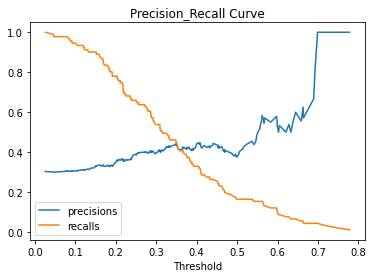

In [22]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [23]:
# precisions >= 0.7

In [24]:
np.argmax(precisions >= 0.7)

295

In [25]:
thresholds[np.argmax(precisions >= 0.7)]

0.6923723311446429

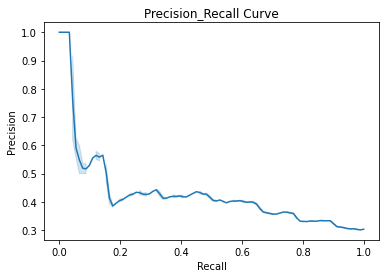

In [26]:
plt.title('Precision_Recall Curve')
sns.lineplot(recalls, precisions);
plt.xlabel('Recall');
plt.ylabel('Precision');

### select threshold using f1 score

In [27]:
(2*precisions[0]*recalls[0])/(precisions[0]+recalls[0])

0.4654731457800512

In [28]:
(2*precisions*recalls)/(precisions+recalls)

array([0.46547315, 0.46153846, 0.45758355, 0.45876289, 0.45994832,
       0.4611399 , 0.46233766, 0.46354167, 0.46475196, 0.46596859,
       0.4671916 , 0.46315789, 0.46437995, 0.46031746, 0.46153846,
       0.46276596, 0.464     , 0.45989305, 0.46112601, 0.46236559,
       0.46361186, 0.46486486, 0.46070461, 0.46195652, 0.46321526,
       0.46448087, 0.46575342, 0.46703297, 0.46831956, 0.4640884 ,
       0.46537396, 0.46666667, 0.46239554, 0.46368715, 0.46498599,
       0.46629213, 0.46760563, 0.46892655, 0.46458924, 0.46590909,
       0.46723647, 0.46857143, 0.46991404, 0.47126437, 0.47262248,
       0.47398844, 0.47536232, 0.47674419, 0.47813411, 0.47953216,
       0.48093842, 0.48235294, 0.48377581, 0.4852071 , 0.48664688,
       0.48214286, 0.48358209, 0.48502994, 0.48648649, 0.48795181,
       0.48338369, 0.47878788, 0.48024316, 0.48170732, 0.48318043,
       0.48466258, 0.48      , 0.48148148, 0.47678019, 0.47204969,
       0.47352025, 0.475     , 0.47648903, 0.47798742, 0.47318

In [29]:
# np.argmax([1,4,3])

In [30]:
np.max((2*precisions*recalls)/(precisions+recalls))

0.49372384937238495

In [31]:
np.argmax((2*precisions*recalls)/(precisions+recalls))

152

In [32]:
thresholds[152]

0.2561842823320565

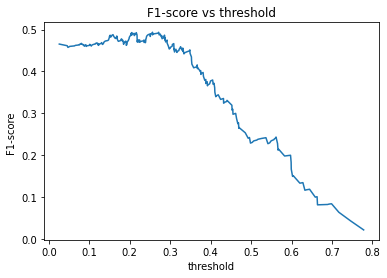

In [33]:
plt.title('F1-score vs threshold')
sns.lineplot(thresholds, ((2*precisions*recalls)/(precisions+recalls))[:-1]);
plt.xlabel('threshold');
plt.ylabel('F1-score ');

In [34]:
from sklearn.metrics import auc

In [35]:
auc(recalls,precisions)

0.42870876733301755

# ROC curve

In [36]:
fpr, tpr, thresholds = roc_curve(df1['True_values'], df1['probability_class-1'])

In [37]:
from sklearn.metrics import roc_auc_score

AUROC = 0.6200641463799359


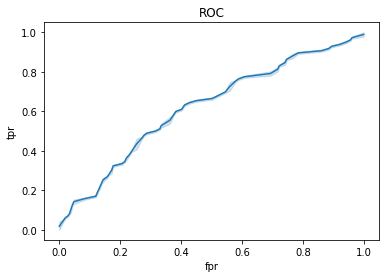

In [38]:
plt.title('ROC')
sns.lineplot(fpr, tpr);
plt.xlabel('fpr');
plt.ylabel('tpr');
print('AUROC =',roc_auc_score(df1['True_values'], df1['probability_class-1']))

In [39]:
auc(fpr,tpr)

0.6200641463799359